In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_dir = 'dataset'

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    directory=os.path.join(dataset_dir, 'train'),
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

val_data = val_datagen.flow_from_directory(
    directory=os.path.join(dataset_dir, 'val'),
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

test_data = test_datagen.flow_from_directory(
    directory=os.path.join(dataset_dir, 'test'),
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

Found 2034 images belonging to 3 classes.
Found 195 images belonging to 3 classes.
Found 99 images belonging to 3 classes.


In [4]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers[:15]:  # Freeze sebagian layer awal
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,090,435 (76.64 MB)

 Trainable params: 11,865,091 (45.26 MB)

 Non-trainable params: 8,225,344 (31.38 MB)

In [5]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)

model.save('model_vgg19_sapi.h5')

c:\Users\digit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 369s 3s/step - accuracy: 0.8000 - loss: 0.5314 - val_accuracy: 0.8974 - val_loss: 0.1886
Epoch 2/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.9170 - loss: 0.2233 - val_accuracy: 0.9590 - val_loss: 0.2295
Epoch 3/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - accuracy: 0.9578 - loss: 0.1329 - val_accuracy: 0.9692 - val_loss: 0.2033
Epoch 4/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.9766 - loss: 0.0765 - val_accuracy: 0.9846 - val_loss: 0.1621
Epoch 5/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9538 - loss: 0.1343 - val_accuracy: 0.9795 - val_loss: 0.0920
Epoch 6/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9798 - loss: 0.0509 - val_accuracy: 0.9590 - val_loss: 0.0971
Epoch 7/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.9888 - loss: 0.0394 - val_accuracy: 0.9795 - val_loss: 0.1090
Epoch 8/15
128/128 ━━━━━━━━━━━━━━━━━━━━ 327s 3s/step - accuracy: 0.9810 - loss: 0.0545 - val_accu

In [6]:
import numpy as np

y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_data.classes

7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step


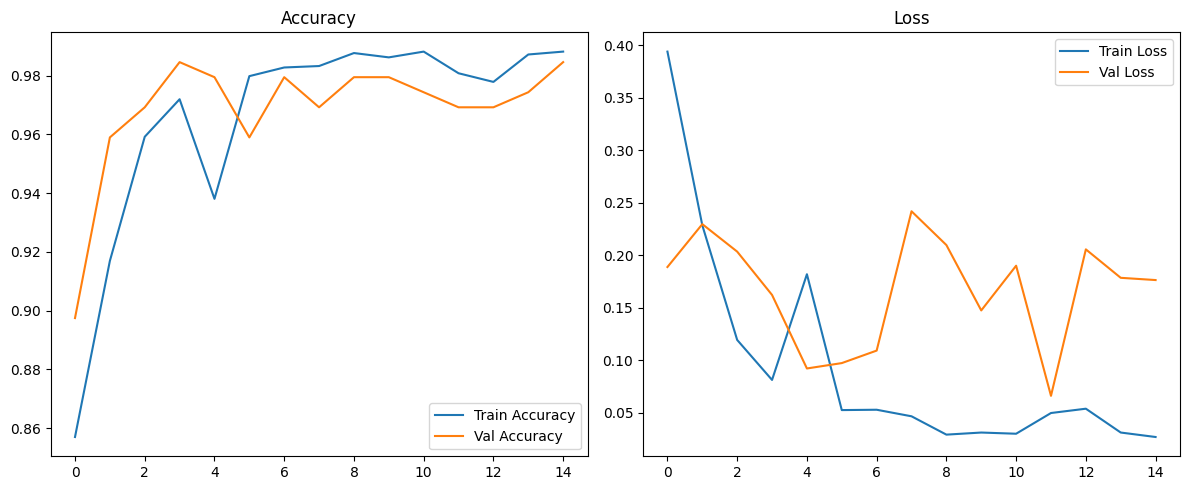

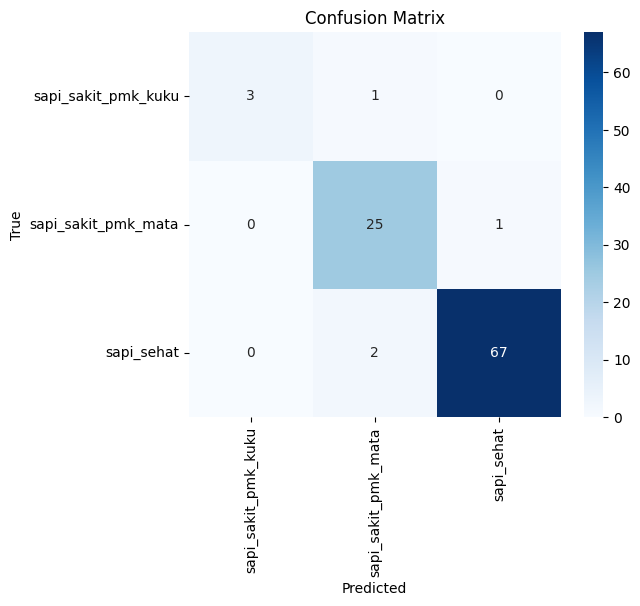

Classification Report:
                     precision    recall  f1-score   support

sapi_sakit_pmk_kuku       1.00      0.75      0.86         4
sapi_sakit_pmk_mata       0.89      0.96      0.93        26
         sapi_sehat       0.99      0.97      0.98        69

           accuracy                           0.96        99
          macro avg       0.96      0.89      0.92        99
       weighted avg       0.96      0.96      0.96        99



In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Plot Akurasi dan Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(test_data.class_indices.keys())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))